In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils
import datetime
import matplotlib.animation as animation
from IPython.display import HTML

aISDM = AISDataManager()

In [3]:
srcDir = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/"
trackLenDesFile = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1004.csv"
trackLenDF,_ = aISDM.load_data_from_csv(trackLenDesFile)

In [4]:
lonMin = -122.00
lonMax = -118.50
latMin = 33.40
latMax = 36.40
gridSize = 0.01

yearList = [ \
        2015 \
        , 2016 \
        , 2017 \
        , 2018 \
        , 2019 \
        , 2020 \
]

monList = [ \
    1 \
    , 2 \
    , 3 \
    , 4 \
    , 5 \
    , 6 \
    , 7 \
    , 8 \
    , 9 \
    , 10 \
    , 11 \
    , 12 \
]

In [5]:
hMNumColmn = int(np.floor((lonMax - lonMin)/gridSize))
hMNumRows = int(np.floor((latMax - latMin)/gridSize))
print(hMNumRows, hMNumColmn)
print(hMNumRows*hMNumColmn)

300 350
105000


In [6]:
hMArr = []
for year in yearList[0:]:
    for mon in monList[0:]:
        monthTraj = trackLenDF[(trackLenDF['TRAJ_MON']==mon) & (trackLenDF['TRAJ_YEAR']==year)]
        print(monthTraj.shape)
        mMSIColmn = monthTraj.columns.tolist().index('MMSI')
        trajNumColmn = monthTraj.columns.tolist().index('TRAJ_NUM')
        #now iterate through every trajectory
        tempHM = np.zeros((hMNumRows, hMNumColmn))
        print(tempHM.shape)
        for i in range(0,monthTraj.shape[0]):
            trajFile = srcDir + str(monthTraj.iloc[i,mMSIColmn]) + '_' + str(monthTraj.iloc[i,trajNumColmn]) + '.csv'
            print(trajFile)
            singleTrajData,_ = aISDM.load_data_from_csv(trajFile)
            lonArr = singleTrajData['LON'] - lonMin
            lonArr = np.floor(lonArr/gridSize)
            lonArr = lonArr.astype(int)
            
            latArr = singleTrajData['LAT'] - latMin
            latArr = np.floor(latArr/gridSize)
            latArr = latArr.astype(int)
        
            tempHM[latArr,lonArr] = tempHM[latArr,lonArr] + 1
        hMArr.append(tempHM.copy())    

(391, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355754000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355754000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355109000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355109000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355109000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355095000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355095000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355029000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355029000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355029000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355395000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_0.

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371207000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371207000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477076500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566410000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566410000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566974000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566922000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566922000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565747000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565661000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354203000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354203000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354212000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352492000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352517000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351968000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373529000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372740000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372740000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367535950_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372884000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373004000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370560000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309841000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257758000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257842000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477990800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477831200_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355283000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355283000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355283000_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/209550000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015371_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015371_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319035500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319035500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016497_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257343000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092432_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256058000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257424000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259895000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257613000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257613000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563119000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220595000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228342900_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564756000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564897000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564897000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564897000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_2.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370508000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370508000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/209355000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015771_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015771_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015371_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319035500_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111947_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092168_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248264000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091382_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091382_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091349_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244778000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244778000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/244810690_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220416000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_1.csv
(462, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355649000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355649000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355649000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_3.

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370485000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/209550000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311918000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311921000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015819_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_10.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093618_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090618_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805554_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091894_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091894_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091894_3.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351954000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352027000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352027000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_6.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357249000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357289000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371885000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371885000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371885000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371964000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477407900_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413159000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413159000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413165000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416468000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416475000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416475000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416475000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416482000_4.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013646_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013646_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014796_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009174_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009381_13.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002117_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004494_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004494_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005152_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005152_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005102_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004927_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003521_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_1.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477707000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477707000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477744600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_5.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369464000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369464000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369464000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369464000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371443000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371443000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371710000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092485_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000299_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_11.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093618_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091717_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091403_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091403_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091857_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/239850000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/246887000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/246887000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_2.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352808000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352808000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352808000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352808000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352840000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352840000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352840000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352871000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229622000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090156_1.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356476000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356476000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356101000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356101000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356101000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356101000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356101000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357247000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357249000_3.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477463200_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_11.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566748000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_6.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259976000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258008000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257448000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257560000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257613000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257627000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257627000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257627000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_11.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564995000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564995000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563394000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_6.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370289000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370289000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370644000_0.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015422_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015422_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311044300_0.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/246887000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_26.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352542000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351934000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351934000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351733000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352608000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_3.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477752800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477752800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_10.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477136800_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477463200_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477463200_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477560400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_13.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016646_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311040700_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_7.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308921000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309108000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305346000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_16.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_5.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370677000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_15.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015912_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016169_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311063500_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_9.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305347000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305347000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235073571_2.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563172000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563313000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564203000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005733_7.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367641230_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367641230_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370737000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370117000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_15.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311291000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311291000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319016900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015110_0.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235114033_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_11.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352283000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352355000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352142000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352142000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352142000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352542000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351848000_3.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357076000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356919000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372031000_1.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477407900_16.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014243_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014243_1.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212301000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338832000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351240000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351340000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351467000_10.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220245000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220245000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005733_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005733_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_5.csv
(439, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212151000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355768000_

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371623000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371623000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371623000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371641000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371641000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371641000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371641000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_18.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015421_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015370_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015228_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015228_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015675_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015675_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_0.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068882_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068882_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068085_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068085_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305346000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_10.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563579000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563255000_1.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370188000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370552000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370552000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370677000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367864000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367864000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368063000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367719640_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_23.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010450_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000102_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000102_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016489_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000317_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_22.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091394_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091394_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012800_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248264000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248264000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248265000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_46.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353647000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353647000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354778000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354778000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_5.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357067000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_29.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477323000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_21.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566853000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565599000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565599000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_15.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354740000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354778000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354778000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_4.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477818000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357147000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357213000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356990000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_30.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374077000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211327410_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211335760_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_2.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805662_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091708_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_52.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354203000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352492000_17.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477776100_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357347000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357347000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357347000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357347000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356509000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356509000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356580000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356580000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477815200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477815200_1.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477065200_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477065200_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_23.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_16.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_9.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005430_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220129000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220129000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220416000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220416000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006339_0.csv
(460, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212151000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212151000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/35599900

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369463000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370869000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370869000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_8.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311054400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311054400_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311063500_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015771_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015659_2.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636008621_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319819000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232664000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232664000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338009000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249888000_16.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564910000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563831000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005263_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006301_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005795_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220416000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005230_0.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372829000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372829000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372995000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372995000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370477000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370477000_3.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_40.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015717_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015660_14.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249620000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249174000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249174000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235117234_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080187_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080187_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_17.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004759_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004202_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003576_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003576_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003691_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003729_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003993_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003742_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004203_0.csv
/home/jcharla/L

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357388000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357388000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477791100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212105000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212105000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212105000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_15.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477105200_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_23.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003300_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003300_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566454000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566998000_1.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068085_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266261000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/306109000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305346000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259885000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259885000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257565000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_6.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563982000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563982000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563876000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563876000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220199000_2.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370413000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_34.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432666000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432666000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432729000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432729000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016038_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319013600_1.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805866_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805866_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805866_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805889_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805625_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/253406000_0.csv
/home/jcharla/Li

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004203_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477858300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477858300_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353288000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353619000_1.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369527000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369527000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_20.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015819_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015819_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_13.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805889_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805889_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805913_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_13.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351690000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353910000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353910000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353978000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353978000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353978000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_2.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357977000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357977000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357412000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357412000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366203000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_31.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477347100_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_10.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566613000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_45.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477959200_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351223000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351223000_12.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_12.csv
(449, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355649000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477830800_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477830800_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355856000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/47763

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368916000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368916000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369463000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371060000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371318000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367070510_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_14.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576327000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092627_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_34.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212351000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212351000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351223000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351223000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215654000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215654000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_190.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_191.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355139000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355139000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355488000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355488000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355488000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355395000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477789000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357961000_4.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477071800_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_14.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566951000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566044000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566044000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566095000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566095000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_42.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305854000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305885000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256871000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805944_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805944_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805960_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805960_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259805000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_2.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229213000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229213000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229213000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564268000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564268000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564913000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563758000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563982000_18.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371592000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371618000_2.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311062200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319035500_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_19.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091082_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080187_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080187_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805914_11.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351223000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351340000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351340000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_213.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_214.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_215.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_216.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655800_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477669400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355558000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355558000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355368000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357977000_3.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477220400_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477102200_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477108100_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519400_4.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_20.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003648_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002570_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003692_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003692_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004117_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004086_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003947_2.csv
/home/jcharla/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366562000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366629000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366629000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356577000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356219000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356219000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_28.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478700_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441800_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_40.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016420_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311002600_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311002600_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311002800_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311002800_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_1.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235068051_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017486_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266261000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308653000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_27.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563004900_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563108000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563108000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563033000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563033000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007259_0.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372241000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372241000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372025000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_36.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431127000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431127000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374077000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374700000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441722000_6.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566087000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566087000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566085000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_1.csv
/home/jcharl

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257672000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212351000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212351000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_13.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_16.csv
(516, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477669500_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355754000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355286000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477652700_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356005000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/35600500

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368836000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370852000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_4.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311075300_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_35.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015743_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319013600_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_10.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091079_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090966_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805668_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805668_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235094713_0.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004171_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004086_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004006_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003831_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004203_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353778000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_35.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356005000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354988000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355170000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355170000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357926000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366102000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477742600_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_36.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477195900_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477195900_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477207400_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477207400_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_34.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015744_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015659_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_44.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009240_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_30.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235102465_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805668_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805668_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805668_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805864_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093327_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093327_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248349000_1.csv
/home/jcharla

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351690000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353288000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353288000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_38.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_53.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356688000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356688000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356688000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357295000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357092000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357076000_7.csv
/home/jcha

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_46.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477066700_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477066700_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_48.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014302_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014302_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_23.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477990200_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477990200_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351137000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351137000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_40.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_274.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_275.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_276.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_277.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005692_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220416000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_17.csv
(483, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/35

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369527000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369527000_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_11.csv
/home/j

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235011050_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235010710_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_107.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_108.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_109.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017294_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017294_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017294_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017176_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/303584000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017155_18.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477883900_3.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372340000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372445000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372557000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372610000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372241000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_4.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416497000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374038000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374353000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374590000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374654000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_29.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_24.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_51.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_52.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013578_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_16.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351678000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351124000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_299.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_300.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004378_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219617000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/219617000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003576_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003576_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003648_6.csv
/home/jchar

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229726000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563982000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563982000_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564126000_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_23.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006297_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005487_0.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005487_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220593000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220593000_19.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372747000_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372747000_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372747000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367535950_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372805000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372945000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_42.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_50.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_51.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_27.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431496000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431496000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432666000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432669000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432783000_3.csv
/home/jch

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015019_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576327000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249758000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235414000_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_11.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_301.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_302.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_303.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_304.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_305.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_306.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004313_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004709_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004709_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004913_12.csv


/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367196000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_28.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_37.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_20.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_76.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_32.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566088000_2.csv
/home

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218826000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_309.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_36.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004086_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_45.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354373000_6.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229934000_5.csv
(24, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_61.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3727

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477607700_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_43.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372241000_24.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_48.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_33.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477136800_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_18.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_16.csv
/hom

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352732000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564902000_7.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229934000_6.csv
(19, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357682000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_64.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_41.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_31.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006511_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2351026

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117400_34.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_49.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416482000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_119.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_14.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017153_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266261000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309369000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_19.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352935000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006859_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220413000_24.csv
(26, 8)

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_30.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015228_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_115.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_72.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235554000_25.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093618_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266339000_1.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_3.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_43.csv
/home/

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_22.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015659_15.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015659_16.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_11.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310768000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309905000_4.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309905000_5.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_26.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_56.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212347000_39.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477942900_2.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338731000_8.csv
/home/jc

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_38.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_12.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310764000_13.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016437_21.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014997_17.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266283000_8.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266283000_9.csv
(20, 8)
(300, 350)
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372610000_9.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372610000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_10.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_47.csv
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/47711

In [7]:
print(len(hMArr))

72


In [8]:
hMCounter = 0
for year in yearList[0:]:
    for mon in monList[0:]:
        opFile = "/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/" + str(year) + "_" + str(mon)+'.npy'
        print(opFile)
        np.save(opFile, hMArr[hMCounter])
        hMCounter = hMCounter + 1

/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_1.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_2.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_3.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_4.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_5.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_6.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_7.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_8.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_9.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_10.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_11.npy
/home/jcharla/LiporLab/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_12.npy
/home/jcharla

In [9]:
offset = 0
hMJan = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 1
hMFeb = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 2
hMMarch = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 3
hMApril = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 4
hMMay = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 5
hMJune = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 6
hMJuly = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 7
hMAug = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 8
hMSept = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 9
hMOct = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 10
hMNov = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]
offset = 11
hMDec = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]+hMArr[offset + (12*5)]

In [10]:
seasonalHM = [hMJan \
             , hMFeb \
             , hMMarch \
             , hMApril \
             , hMMay \
             , hMJune \
             , hMJuly \
             , hMAug \
             , hMSept \
             , hMOct \
             , hMNov \
             , hMDec \
             ]

In [11]:
maxSeasonalVal = np.max(seasonalHM[0])
for hM in seasonalHM:
    if(np.max(hM) > maxSeasonalVal):
        maxSeasonalVal = np.max(hM)
print(maxSeasonalVal)

456.0


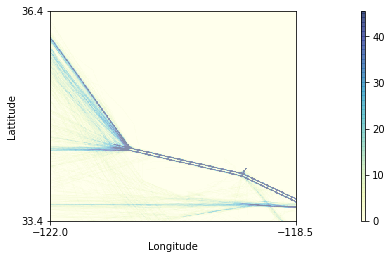

In [12]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.15, 0.83, 0.73])
ax2 = fig.add_axes([0.95, 0.15, 0.01, 0.73])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Lattitude')

ax1.set_xticks([lonMin,lonMax])
ax1.set_yticks([latMin,latMax])

def animate(i):
    tempHMDisp = np.flip(seasonalHM[i],axis=0)
    iMShowHandler = ax1.imshow(tempHMDisp, cmap=plt.get_cmap('YlGnBu'),extent=[lonMin,lonMax,latMin,latMax],alpha = 0.5, vmax = maxSeasonalVal/10)
    fig.colorbar(iMShowHandler,ax2)
    
anim = animation.FuncAnimation(fig, animate,frames=12, interval=1000)

In [13]:
HTML(anim.to_html5_video())